In [1]:
import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

from tmrl.custom.utils.window import WindowInterface

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from model import BotDemineur
import torch

import cv2
import pyautogui
import numpy as np
import os

C:\Users\Max\AppData\Roaming\Python\Python37\site-packages\ipykernel\pylab\config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [2]:
wi = WindowInterface("Démineur")
wi.move_and_resize(w=500,h=320)

C:\Users\Max\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
class DemineurInterface():
    
    def __init__(self):
        
        self.windowInterface = WindowInterface("Démineur")
        self.grid = Grid()
    
    def grab_image(self):
        
        img = self.windowInterface.screenshot()[:,:,:3]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        return img
    
    def reset(self):
        pass
    
    def get_observations(self):
        
        img = self.grab_image()
        data = self.grid.extract_from_image(img)
        
        return data        
    
    def send_control(self, x, y):
        pyautogui.click(x, y)
        
        

In [4]:
class Grid():
    
    def __init__(self, rows=16, cols=30):

        self.rows = rows
        self.cols = cols
        self.case_width = 16
        self.case_height = 16
        self.first_case_x = 55
        self.first_case_y = 12
        
        self.grid = np.zeros((self.rows, self.cols))
        
        # Define click position for each case on the grid
        self.click_offsets = (101, 13)
        
        X = np.floor(np.linspace(self.click_offsets[0] + self.case_height // 2, self.click_offsets[0] + self.rows * self.case_height, self.rows))
        Y = np.floor(np.linspace(self.click_offsets[1] + self.case_width // 2, self.click_offsets[1] + self.cols * self.case_width, self.cols))

        self.click_pos = np.stack(np.meshgrid(Y,X), axis=-1)
        
        # Load cases templates
        self.load_cases()
        
        
    def load_cases(self):
        
        casesNames = os.listdir("images/cases")
        
        self.cases_templates = np.zeros((len(casesNames), self.case_width, self.case_height, 3))
        self.cases_labels = []
        
        for i in range(len(casesNames)):
            
            case = cv2.imread("images/cases/" + casesNames[i])[:,:,:3]
            
            self.cases_templates[i,...] = case[:,:,::-1]
            self.cases_labels.append(casesNames[i].rsplit('_', 1)[0])
        
        
    def extract_from_image(self, img):
        """ Convert the grid on the image into a python object """
        
        for i in range(self.rows):
            for j in range(self.cols):
                
                x = self.first_case_x + i * self.case_height
                y = self.first_case_y + j * self.case_width
                
                case_extract = img[x:x + self.case_height, y:y + self.case_width]

                case_extract = np.tile(case_extract[None,...], [len(self.cases_labels), 1, 1, 1])
                
                diff = np.sum((self.cases_templates - case_extract)**2, axis=(1,2,3))
                
                self.grid[i,j] = np.argmin(diff)

        return self.grid

        
    

In [5]:
""" grid = Grid()

print(grid.cases_labels)

input = torch.unsqueeze(torch.unsqueeze(torch.Tensor(grid.extract_from_image(img)), 0), 0)

model = BotDemineur(16,30,14)

print(model(input))

plt.imshow(grid.extract_from_image(img)) """

' grid = Grid()\n\nprint(grid.cases_labels)\n\ninput = torch.unsqueeze(torch.unsqueeze(torch.Tensor(grid.extract_from_image(img)), 0), 0)\n\nmodel = BotDemineur(16,30,14)\n\nprint(model(input))\n\nplt.imshow(grid.extract_from_image(img)) '

True

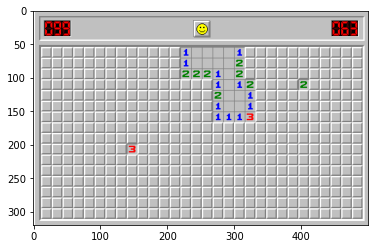

In [6]:
di = DemineurInterface()
img = di.grab_image()
plt.imshow(img)

cv2.imwrite("images/grid.jpg", img[:,:,::-1])
# 12,55
# 27, 70


# 72, 16
# 95, 39
#cv2.imwrite("images/defeat.png", img[15:41, 71:97][:,:,::-1])
#img[15:41, 71:97].shape # 26 x 26

# 239, 15 top-left coord for status icon

(16, 16, 3)


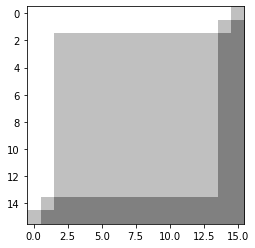

In [7]:
i,j = 2,1

w,h = 16,16
x, y= 55,12

case = img[x + i * w: x + (i + 1) * w, y + j * h: y + (j + 1) * h]
print(case.shape)

plt.imshow(case)


In [8]:
cv2.imwrite('img/8_case.png', cv2.cvtColor(case, cv2.COLOR_RGB2BGR))

False

In [9]:
from PIL import ImageGrab

im = ImageGrab.grab()
imArr = np.asarray(im)

cv2.imwrite("images/test.png", imArr)

True